# Used Car Price Prediction: KNN

### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
cars_df = pd.read_csv( "new_used_car_v1.csv" )

In [3]:
cars_df.sample(5)

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,KM_Driven,make,mileage_new,engine_new,power_new
2848,5537,Honda Amaze E i-Dtech,Delhi,2013,45000,Diesel,Manual,Second,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,3.30,6,45,honda,25.80,1498.0,98.60
988,1937,Maruti Alto LXi,Chennai,2008,65000,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,NaN,1.59,11,65,maruti,19.70,796.0,46.30
1791,3497,Hyundai Xcent 1.1 CRDi S Option,Delhi,2015,58000,Diesel,Manual,First,24.4 kmpl,1120 CC,71.01 bhp,5.0,NaN,4.95,4,58,hyundai,24.40,1120.0,71.01
1039,2045,Ford Fiesta 1.4 SXi TDCi ABS,Hyderabad,2009,55000,Diesel,Manual,Second,17.8 kmpl,1399 CC,68 bhp,5.0,NaN,2.40,10,55,ford,17.80,1399.0,68.00
1846,3610,Hyundai Creta 1.4 E Plus Diesel,Mumbai,2017,35000,Diesel,Manual,First,21.38 kmpl,1396 CC,88.7 bhp,5.0,NaN,9.90,2,35,hyundai,21.38,1396.0,88.70


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3092 non-null   int64  
 1   Name               3092 non-null   object 
 2   Location           3092 non-null   object 
 3   Year               3092 non-null   int64  
 4   Kilometers_Driven  3092 non-null   int64  
 5   Fuel_Type          3092 non-null   object 
 6   Transmission       3092 non-null   object 
 7   Owner_Type         3092 non-null   object 
 8   Mileage            3092 non-null   object 
 9   Engine             3092 non-null   object 
 10  Power              3092 non-null   object 
 11  Seats              3091 non-null   float64
 12  New_Price          411 non-null    object 
 13  Price              3092 non-null   float64
 14  age                3092 non-null   int64  
 15  KM_Driven          3092 non-null   int64  
 16  make               3092 

### Feature Set Selection

In [5]:
cars_df.columns

Index(['index', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'age', 'KM_Driven', 'make', 'mileage_new',
       'engine_new', 'power_new'],
      dtype='object')

In [6]:
x_features = ['KM_Driven', 'Fuel_Type', 'age',
              'Transmission', 'Owner_Type', 'Seats', 
              'make', 'mileage_new', 'engine_new', 
              'power_new', 'Location']

In [7]:
cat_features = ['Fuel_Type', 
                'Transmission', 'Owner_Type',
                'make', 'Location']

In [8]:
num_features = list(set(x_features) - set(cat_features))

In [9]:
num_features

['Seats', 'power_new', 'KM_Driven', 'engine_new', 'age', 'mileage_new']

In [10]:
cars_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     3092 non-null   int64  
 1   Fuel_Type     3092 non-null   object 
 2   age           3092 non-null   int64  
 3   Transmission  3092 non-null   object 
 4   Owner_Type    3092 non-null   object 
 5   Seats         3091 non-null   float64
 6   make          3092 non-null   object 
 7   mileage_new   3092 non-null   float64
 8   engine_new    3092 non-null   float64
 9   power_new     3092 non-null   float64
 10  Location      3092 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 265.8+ KB


### Dropping Null Values

In [11]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [12]:
cars_df.shape

(3091, 12)

In [13]:
cars_df.sample(5)

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location,Price
1805,93,Diesel,7,Manual,First,5.0,hyundai,23.50,1396.0,88.7,Hyderabad,5.55
563,120,Diesel,8,Manual,First,5.0,tata,18.00,1248.0,75.0,Chennai,1.75
3040,81,Petrol,12,Manual,First,5.0,chevrolet,15.26,1150.0,74.9,Pune,1.30
1867,11,Petrol,7,Manual,First,5.0,chevrolet,16.20,995.0,62.1,Kolkata,1.40
226,3,Petrol,1,Manual,First,5.0,ford,18.16,1196.0,86.8,Hyderabad,6.80


### Setting X and y variables

In [14]:
X = cars_df[x_features]
y = cars_df['Price']

### Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [17]:
X_train

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198.0,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197.0,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993.0,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197.0,81.83,Kochi
...,...,...,...,...,...,...,...,...,...,...,...
522,45,Diesel,5,Manual,First,5.0,maruti,23.40,1248.0,74.00,Kolkata
2260,16,Petrol,2,Manual,First,5.0,tata,23.84,1199.0,84.00,Hyderabad
2983,21,Petrol,4,Manual,First,5.0,hyundai,18.90,1197.0,82.00,Pune
1213,83,Petrol,12,Manual,First,5.0,maruti,14.00,1061.0,64.00,Pune


In [18]:
X_train[0:10]

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198.0,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197.0,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993.0,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197.0,81.83,Kochi
737,12,Petrol,3,Manual,First,5.0,maruti,21.40,1197.0,83.10,Mumbai
265,50,Diesel,4,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
713,59,Petrol,12,Manual,First,4.0,maruti,16.10,796.0,37.00,Jaipur
82,88,Diesel,7,Manual,First,5.0,chevrolet,25.44,936.0,57.60,Jaipur
2918,27,Petrol,2,Manual,First,5.0,maruti,22.74,796.0,47.30,Kochi


In [19]:
X_test.shape

(619, 11)

### Encode Categorical Variables

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

In [22]:
ohe_encoder.fit(X_train[cat_features])

OneHotEncoder(handle_unknown='ignore')

In [23]:
ohe_encoder.categories_

[array(['Diesel', 'Petrol'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First', 'Fourth & Above', 'Second', 'Third'], dtype=object),
 array(['chevrolet', 'datsun', 'fiat', 'ford', 'honda', 'hyundai',
        'mahindra', 'maruti', 'mitsubishi', 'nissan', 'renault', 'skoda',
        'tata', 'toyota', 'volkswagen'], dtype=object),
 array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
        'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
       dtype=object)]

In [24]:
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_features))
encoded_cat_names

['Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Owner_Type_First',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'make_chevrolet',
 'make_datsun',
 'make_fiat',
 'make_ford',
 'make_honda',
 'make_hyundai',
 'make_mahindra',
 'make_maruti',
 'make_mitsubishi',
 'make_nissan',
 'make_renault',
 'make_skoda',
 'make_tata',
 'make_toyota',
 'make_volkswagen',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune']

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [27]:
preprocessor = ColumnTransformer(
    transformers=[        
        ('num', numeric_transformer, num_features),
        ('cat', ohe_encoder, cat_features)])

### KNN (K-Nearest Neighbor)


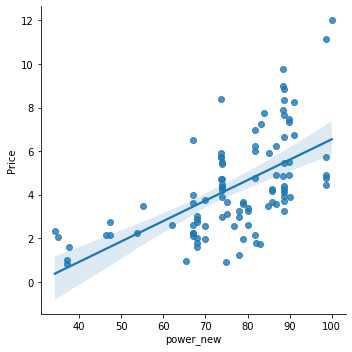

In [28]:
sn.lmplot( data = cars_df.sample(100),
           x = 'power_new',
           y = 'Price');

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
#knn = KNeighborsRegressor(n_neighbors=20)
knn = KNeighborsRegressor(n_neighbors=20, weights='distance')

In [31]:
knn_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('knn', knn)])

In [32]:
knn_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Seats', 'power_new',
                                                   'KM_Driven', 'engine_new',
                                                   'age', 'mileage_new']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Transmission',
                                                   'Owner_Type', 'make',
                                                   'Location'])])),
                ('knn',
                 KNeighborsRegressor(n_neighbors=20, weights='distance'))])

In [37]:
final_feature_names = num_features + list(knn_v1['preprocessor'].transformers_[1][1].get_feature_names())

### Predict on test set

In [38]:
y_pred = knn_v1.predict(X_test)

In [39]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [40]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
770,7.23,6.126197,-1.103803
1540,6.43,5.671373,-0.758627
2962,6.25,5.726384,-0.523616
2040,4.69,3.898999,-0.791001
640,2.65,2.706397,0.056397
81,8.35,5.350159,-2.999841
2773,6.75,6.260425,-0.489575
816,3.00,3.025276,0.025276
305,1.96,1.887195,-0.072805
2907,4.00,4.524794,0.524794


### Measuring Accuracy

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [43]:
mse_v1

0.8746476022620701

In [44]:
rmse_v1 = np.sqrt(mse_v1)

In [45]:
rmse_v1

0.9352259632099988

In [46]:
r2_score(y_test, y_pred)

0.8077620530210918

### K Fold Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
scores = cross_val_score( knn_v1,
                          X_train,
                          y_train,
                          cv = 10,
                          scoring = 'r2')

In [49]:
scores

array([0.83558233, 0.75739364, 0.80871864, 0.76197613, 0.78388534,
       0.79122946, 0.8286391 , 0.800979  , 0.82379652, 0.79921651])

In [50]:
scores.mean()

0.7991416667970672

In [51]:
scores.std()

0.02514063568256746

## Grid Search

In [102]:
from sklearn.model_selection import GridSearchCV

In [130]:
knn_params = { "knn__n_neighbors": [5, 10, 15, 20, 25],
               "knn__weights": ['uniform', 'distance'],
               "knn__metric": ['minkowski', 'euclidean']}

In [131]:
knn_grid_v1 = GridSearchCV(knn_v1,
                           param_grid=knn_params,
                           cv = 10,
                           scoring = 'r2')

In [132]:
knn_grid_v1.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['KM_Driven',
                                                                          'age',
                                                                          'power_new',
                                                                          'Seats',
                                                                          'engine_new',
                                                                          'mileage_new']),
                                                                        ('cat',
                                    

In [133]:
knn_grid_v1.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 10,
 'knn__weights': 'distance'}

In [134]:
knn_grid_v1.best_score_

0.8131319374135145

In [135]:
pd.DataFrame( knn_grid_v1.cv_results_ )

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011696,0.000909,0.024225,0.001724,minkowski,5,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.825235,0.782228,...,0.793983,0.769233,0.773248,0.829334,0.808687,0.842114,0.761927,0.797031,0.026397,11
1,0.011986,0.000638,0.024392,0.000900,minkowski,5,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.835304,0.796189,...,0.796596,0.769545,0.783359,0.849806,0.815633,0.856383,0.764681,0.806103,0.030492,5
2,0.011168,0.000672,0.023018,0.001164,minkowski,10,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.835025,0.760247,...,0.790271,0.776340,0.793419,0.826334,0.810542,0.821834,0.792074,0.800232,0.022051,7
3,0.011541,0.000795,0.023903,0.001526,minkowski,10,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.848461,0.783254,...,0.799427,0.780765,0.804079,0.844299,0.825438,0.842045,0.791572,0.813132,0.024255,1
4,0.011255,0.000616,0.023503,0.001282,minkowski,15,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.821504,0.744532,...,0.768708,0.781283,0.773030,0.825987,0.792970,0.805759,0.788589,0.788839,0.023310,15
5,0.011427,0.000621,0.024222,0.000620,minkowski,15,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.840672,0.771054,...,0.782914,0.785935,0.792042,0.841696,0.815810,0.832408,0.797157,0.806801,0.023872,3
6,0.010908,0.000145,0.023358,0.000689,minkowski,20,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.811998,0.727285,...,0.742503,0.776184,0.770729,0.806940,0.771094,0.790674,0.786853,0.776835,0.024883,17
7,0.010909,0.000080,0.023116,0.000482,minkowski,20,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.835582,0.757347,...,0.762249,0.783885,0.791229,0.828639,0.800970,0.823785,0.799344,0.799175,0.025107,9
8,0.010962,0.000247,0.022734,0.000733,minkowski,25,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.807613,0.726046,...,0.739561,0.771563,0.769353,0.794496,0.756769,0.785441,0.784724,0.771744,0.023700,19
9,0.011045,0.000306,0.022841,0.000568,minkowski,25,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.832607,0.756323,...,0.757289,0.783609,0.791379,0.818238,0.790213,0.819977,0.799617,0.795571,0.024107,13
